In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.arange(0, 4*np.pi, 0.05)

In [19]:
def conv1d(a, w, b = 0, stride = 1, padding = 0):
    # a: input array
    # w: filter
    # b: bias
    # stride: stride
    # padding: padding
    # return: convolution result
    w_old = a.shape[0]
    f = w.shape[0]
    a_pad = np.pad(a, pad_width= padding, mode='constant', constant_values=0)
    w_new = int((w_old + 2 * padding - f) / stride + 1)
    a_result = np.zeros((w_new))
    for i in range(w_new):
        a_result[i] = np.sum(a_pad[i * stride: i * stride + f] * w) + b
    return a_result

In [29]:
x_clear = np.sin(x)
x_noise = x_clear + np.random.normal(0, 0.05, len(x_clear))
x_conv = conv1d(x_noise, np.array([1, 1, 1]) / 3, padding = 1)

Text(0.5, 1.0, 'Convolution')

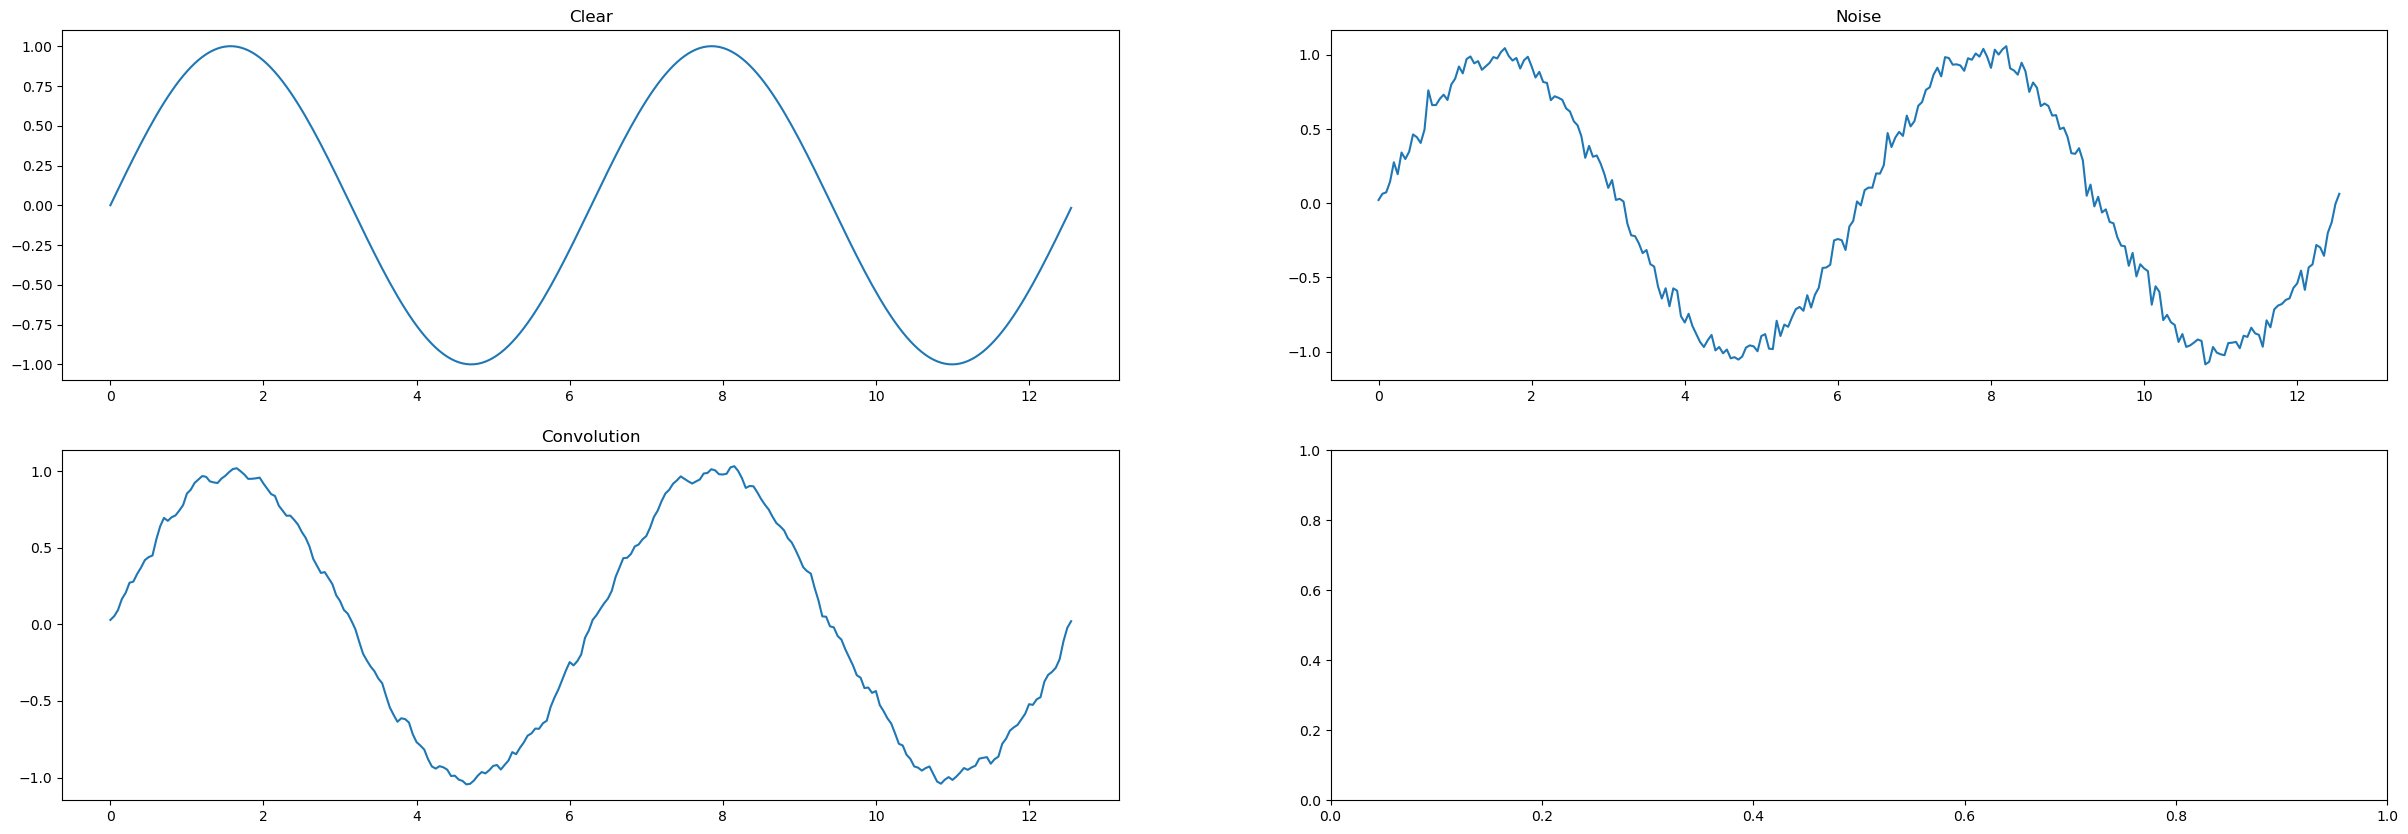

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10))
axes[0][0].plot(x, x_clear)
axes[0][0].set_title('Clear')
axes[0][1].plot(x, x_noise)
axes[0][1].set_title('Noise')
axes[1][0].plot(x, x_conv)
axes[1][0].set_title('Convolution')

In [ ]:
def conv2d(A, W, b, stride = 1, pad = 0):
    """
    A: input, A.shape = (m, n_H_prev, n_W_prev, n_C_prev)
    W: filters, W.shape = (f, f, n_C_prev, n_C)
    b: biases, b.shape = (n_C_new)
    """
    assert A.shape[3] == W.shape[2], 'input.shape[3] must == filters.shape[2]'
    m, n_H_prev, n_W_prev, _ = A.shape 
    f, _, n_C_prev, n_C = W.shape 
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_H_new = int((n_W_old - f + 2*pad)/stride) + 1 
    A_res = np.zeros((m, n_H_new, n_W_new, n_C))
    # compute 
    for i in range(m):
        for h in range(n_H_new): 
            for w in range(n_W_new):
                for c in range(n_C):
                    h_start = h*stride 
                    h_end = h_start + f
                    v_start = v*stride 
                    v_end = v_start + f
                    a_slide = A_pad[i, h_start: h_end, v_start:v_end, :]
                    A_res[i, h, w, c] = np.sum(a_slide * W[:, :, :, c]) + b[c]
    return A_res 


In [31]:
import cv2

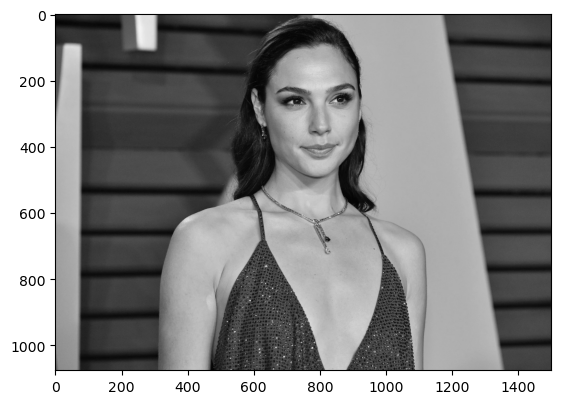

In [35]:
img = cv2.imread('gal-gadot.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

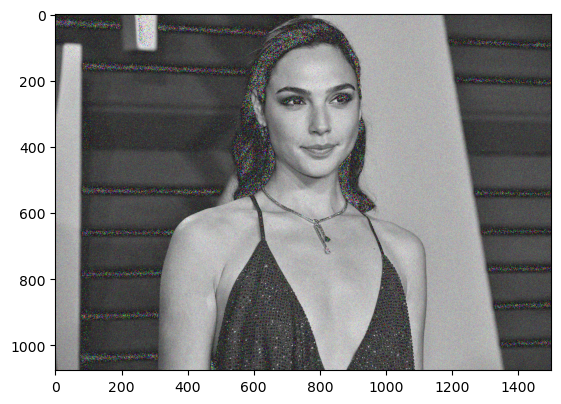

In [37]:
img_noise = img + np.random.normal(0, 20, img.shape)
plt.imshow(img_noise.astype(np.uint8))

In [ ]:
f = 3
w = 1./k**2*np.ones((f, f))
img_denoised = conv2d_11(img_noisy, w)